<a href="https://colab.research.google.com/github/Shibli-Nomani/project-01--Heart-Disease/blob/main/22_heart_disease_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Upload Dataset of Heart Disease**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
path='/content/gdrive/MyDrive/Final Project/Heart Disease.csv'
df = pd.read_csv(path)
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
df.select_dtypes(include=np.number).columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [9]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

#**EDA**

In [11]:
#Column Names
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
#store dataset
df1=df.copy()

**1. Missing value Analysis**

In [13]:
#Handling Missing Value

missing_value=df1.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(40)

,missing,percent
HeartDisease,0,0.0
BMI,0,0.0
KidneyDisease,0,0.0
Asthma,0,0.0
SleepTime,0,0.0
GenHealth,0,0.0
PhysicalActivity,0,0.0
Diabetic,0,0.0
Race,0,0.0
AgeCategory,0,0.0


**additional important features for missing value**

In [ ]:
#isnull( )
#dropna( )

**interpotation to replace the missing value**

In [14]:
#df[['Heartdisease']].interpolate(method='pad')  #[replacing the NAN value numerical in target] (method='pad') or (method='polynomial', order=1) or (method='quadratic')

In [15]:
df1.shape

(319795, 18)

In [16]:
#Data type
df1.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [17]:
#count datatype
df1.dtypes.value_counts()

object     14
float64     4
dtype: int64

**2. Remove duplicates**

In [18]:
#drop duplicates
df1.drop_duplicates(inplace=True)
df1.shape

(301717, 18)

#**Data Visualization**

**3. Explore target columns**

In [19]:
df1['HeartDisease'].value_counts

<bound method IndexOpsMixin.value_counts of 0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 301717, dtype: object>

**Target Column Condition**

In [20]:
df1['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

**4. Explore Dataset for numerical value and retraeted outliers**

In [21]:
#for numerical
df1.select_dtypes(include=np.number).describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


**Quantile and Inter Quantile Range**

In [22]:
#find outliers
df1=df.copy()
for col in df1.columns:
    if df1[col].dtypes != object:
        q1 = df1[col].quantile(0.25)
        #q2 = df1[col].quantile(0.50)
        q3 = df1[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('q1',q1)
        print('q3',q3)
        print('llp',llp)
        print('ulp',ulp)
        print('IQR',IQR)

column name BMI
q1 24.03
q3 31.42
llp 12.945
ulp 42.505
IQR 7.390000000000001
column name PhysicalHealth
q1 0.0
q3 2.0
llp -3.0
ulp 5.0
IQR 2.0
column name MentalHealth
q1 0.0
q3 3.0
llp -4.5
ulp 7.5
IQR 3.0
column name SleepTime
q1 6.0
q3 8.0
llp 3.0
ulp 11.0
IQR 2.0


**5. Dependency and Correlation**

In [23]:
analysis=df1.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in analysis.columns:
  if is_numeric_dtype(analysis[column]):
    continue
  else:
    analysis[column]=le.fit_transform(analysis[column])

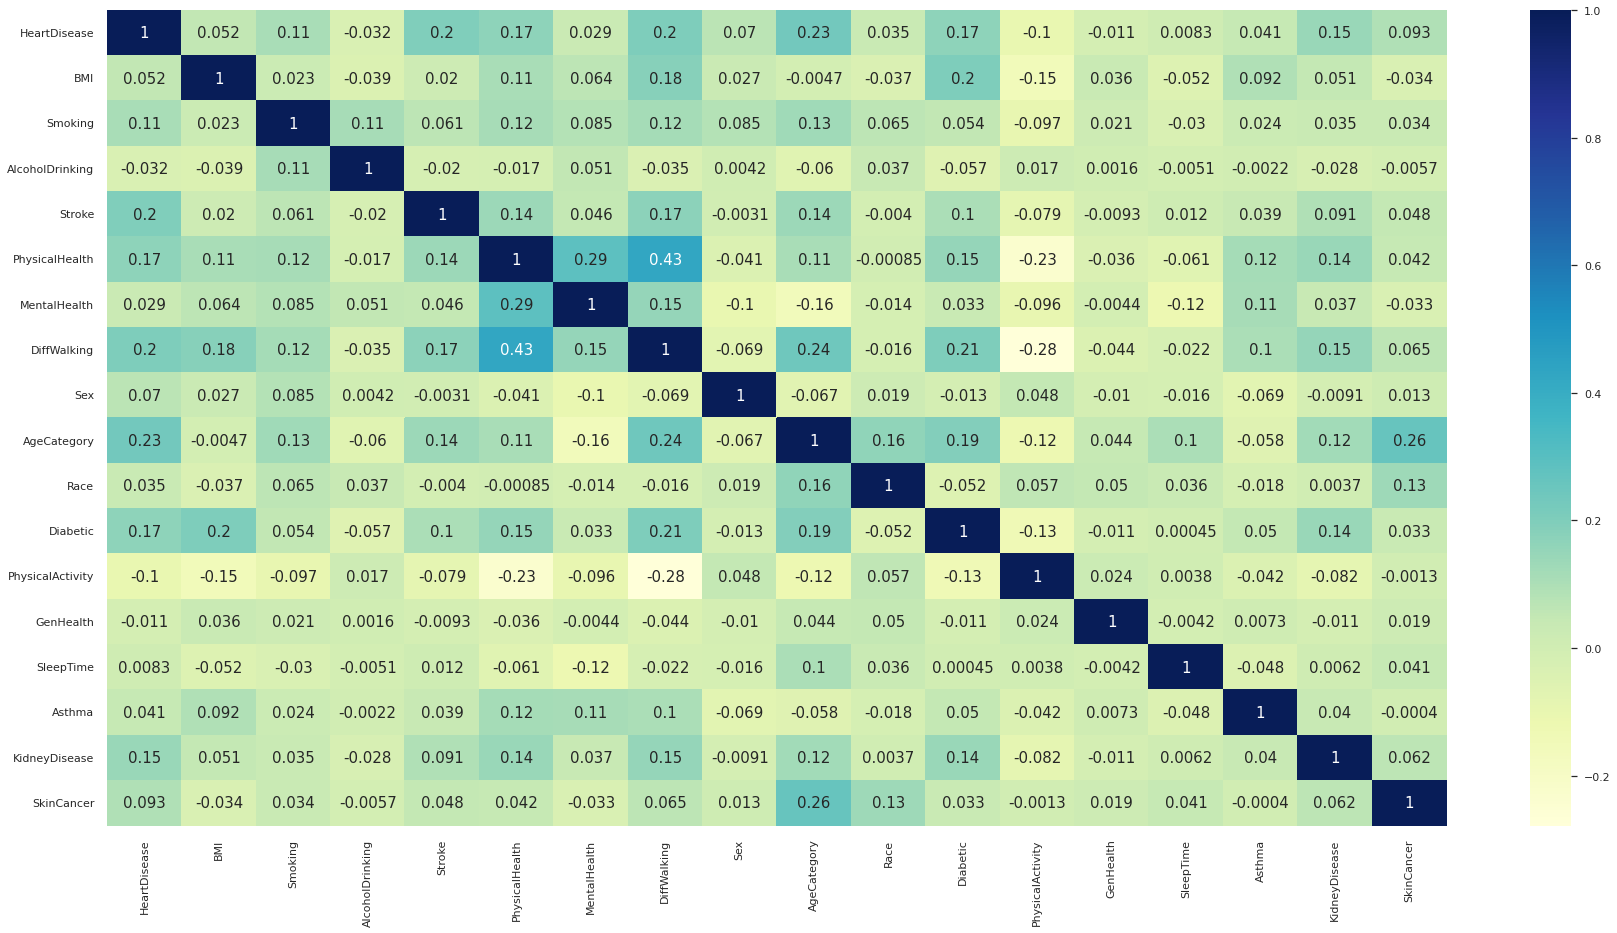

In [44]:
#correlation map
sns.heatmap(analysis.corr(), cmap="YlGnBu", annot=True, annot_kws={"size":15})
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 2)

**List of correlation against target column**

In [36]:
#Correlation with output variable using filtering method
cor = analysis.corr()
cor_target = abs(cor['HeartDisease'])
#Selecting highly correlated features
relevant_features_1 = cor_target[cor_target>0]
relevant_features_1.sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
PhysicalActivity    0.100030
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
AlcoholDrinking     0.032080
MentalHealth        0.028591
GenHealth           0.011062
SleepTime           0.008327
Name: HeartDisease, dtype: float64

**Correlation of columns where corr>0.1**

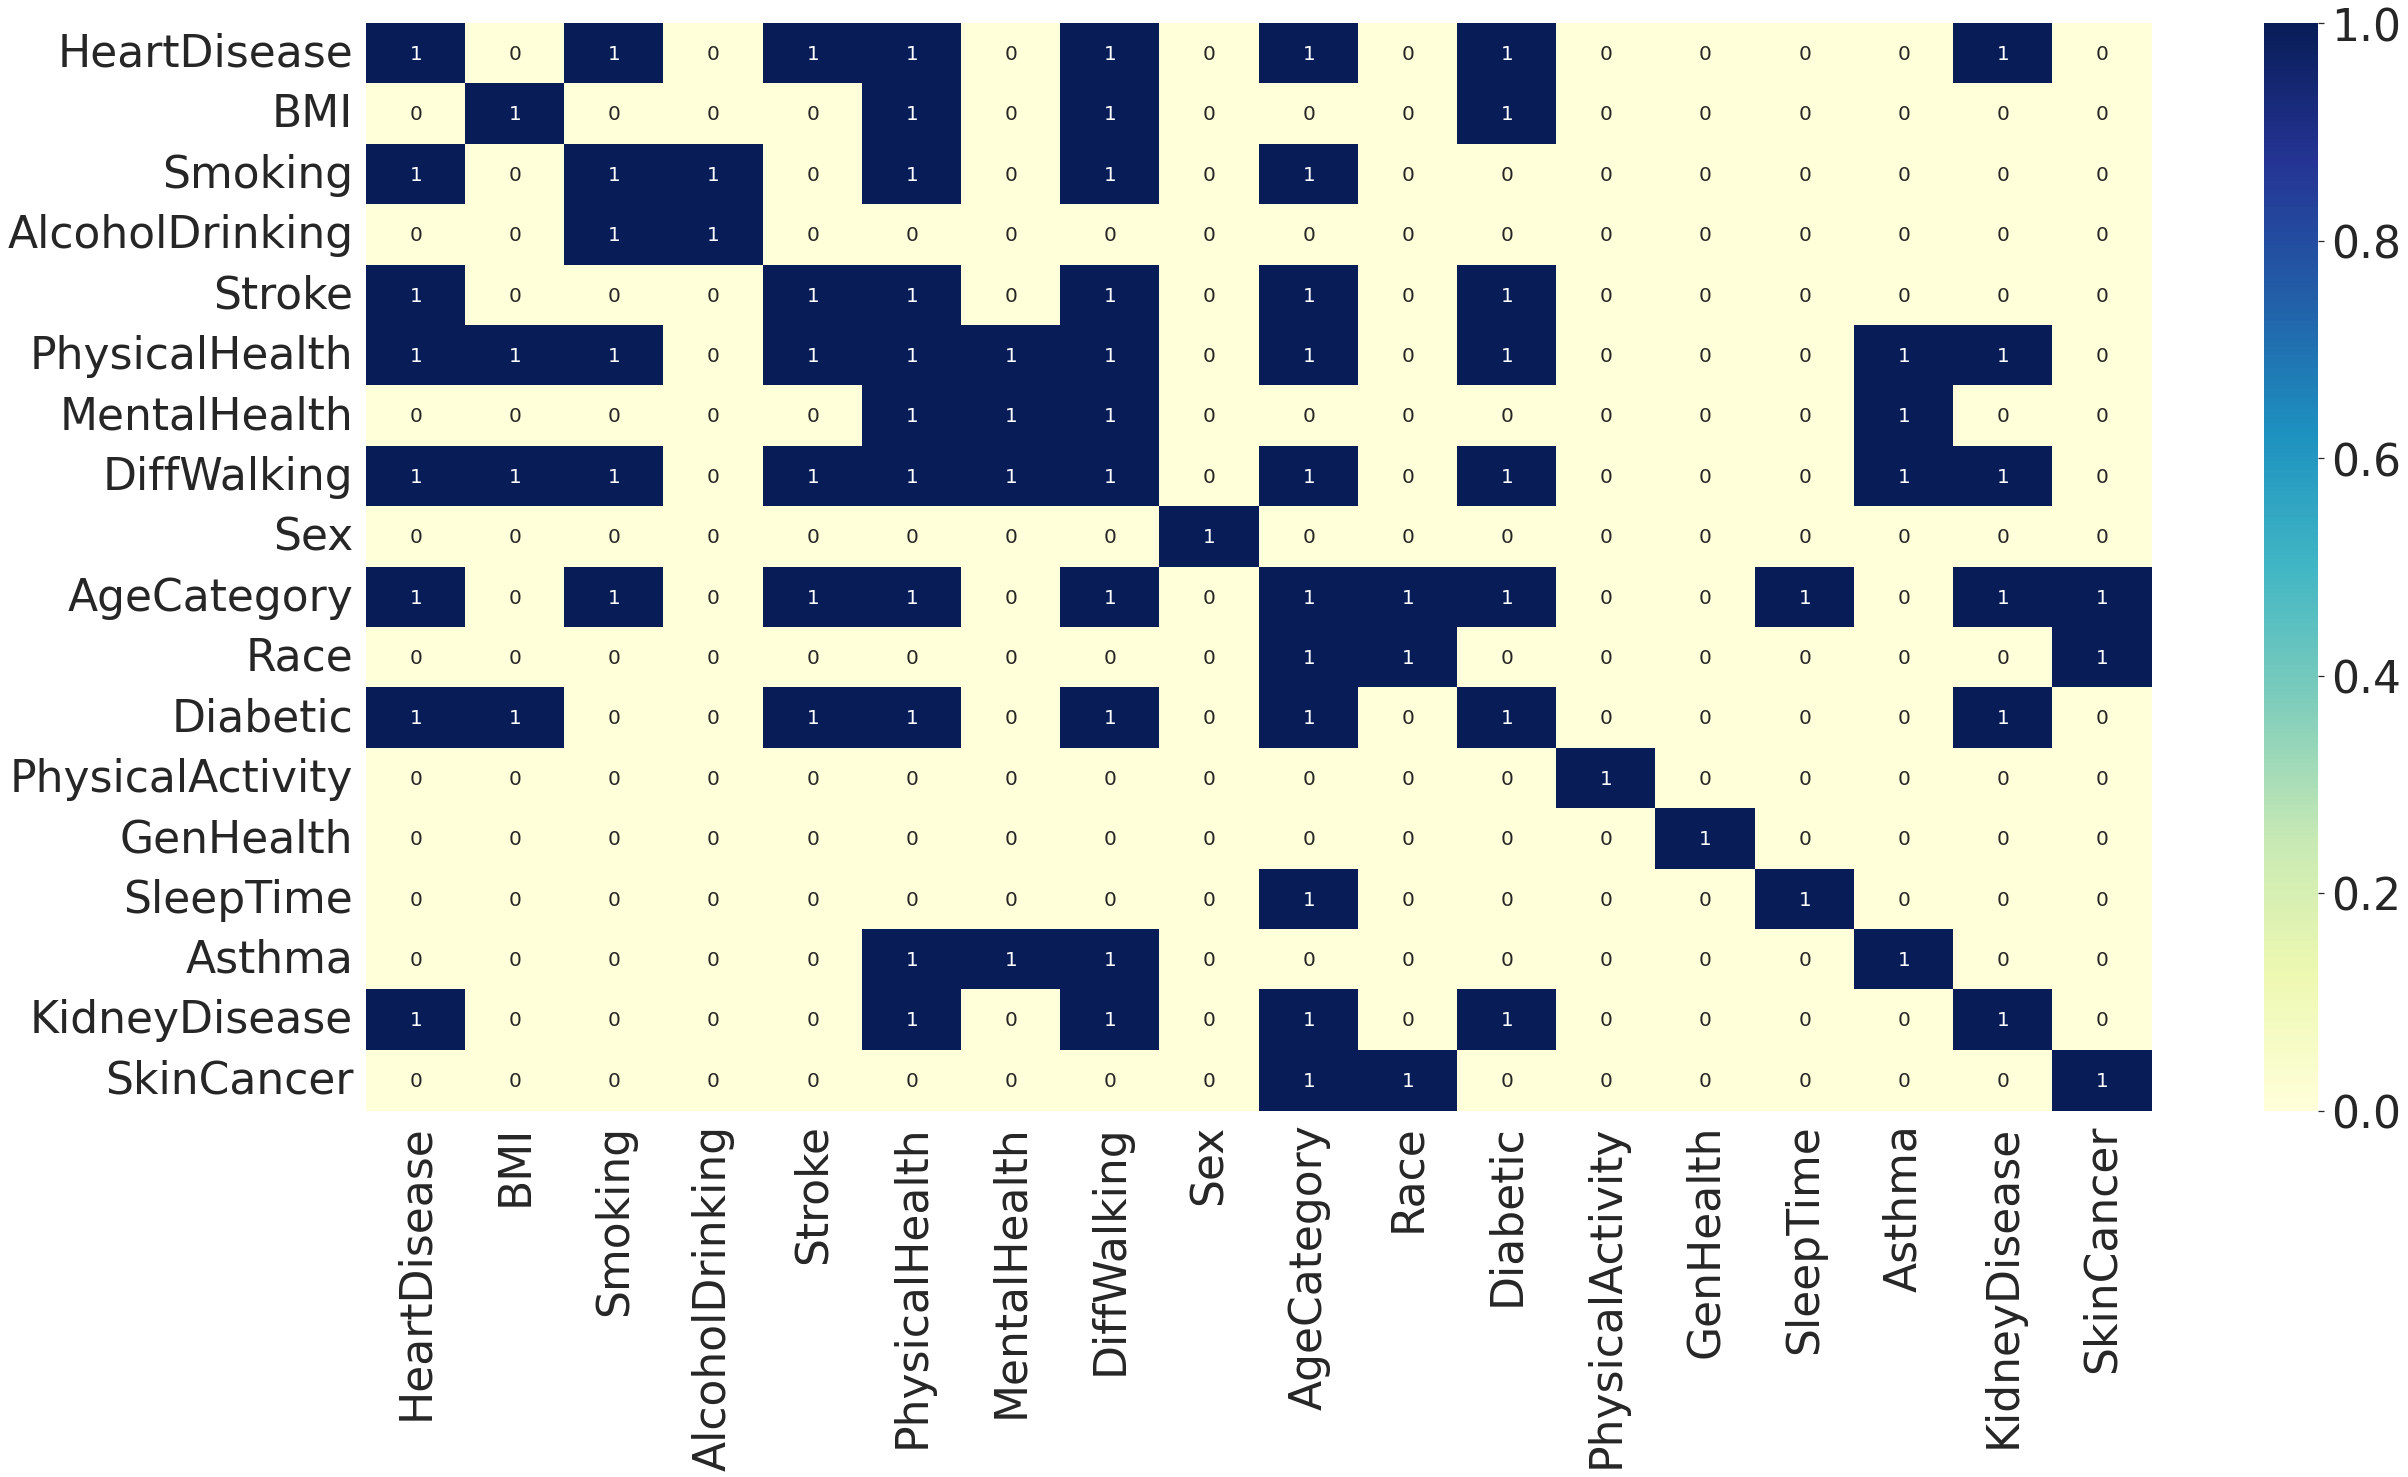

In [39]:
#correlation map
sns.heatmap(analysis.corr()>0.1, cmap="YlGnBu", annot=True, annot_kws={"size":20})
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale = 4)

In [45]:
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.5]
relevant_features2

HeartDisease    1.0
Name: HeartDisease, dtype: float64

#**Data Visualization**

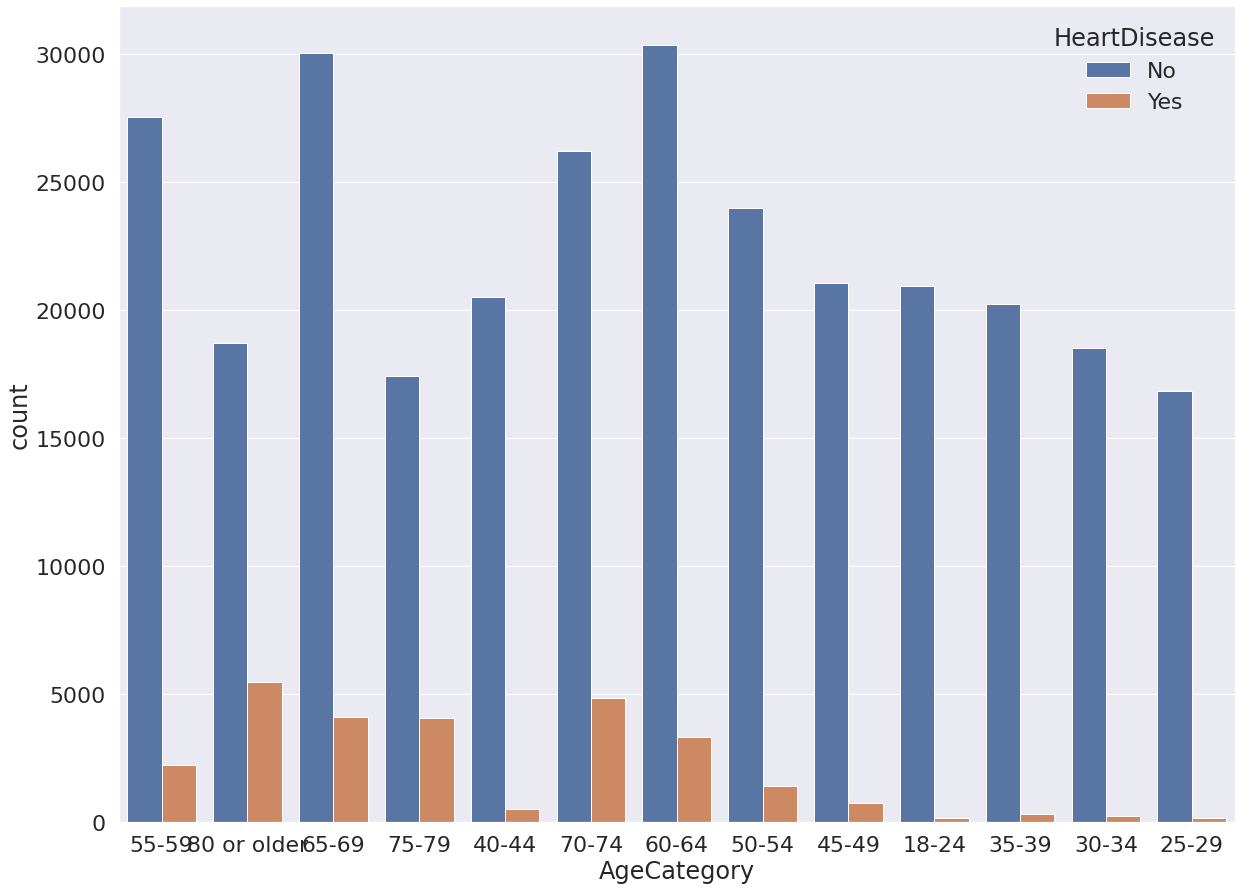

In [46]:
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df1)

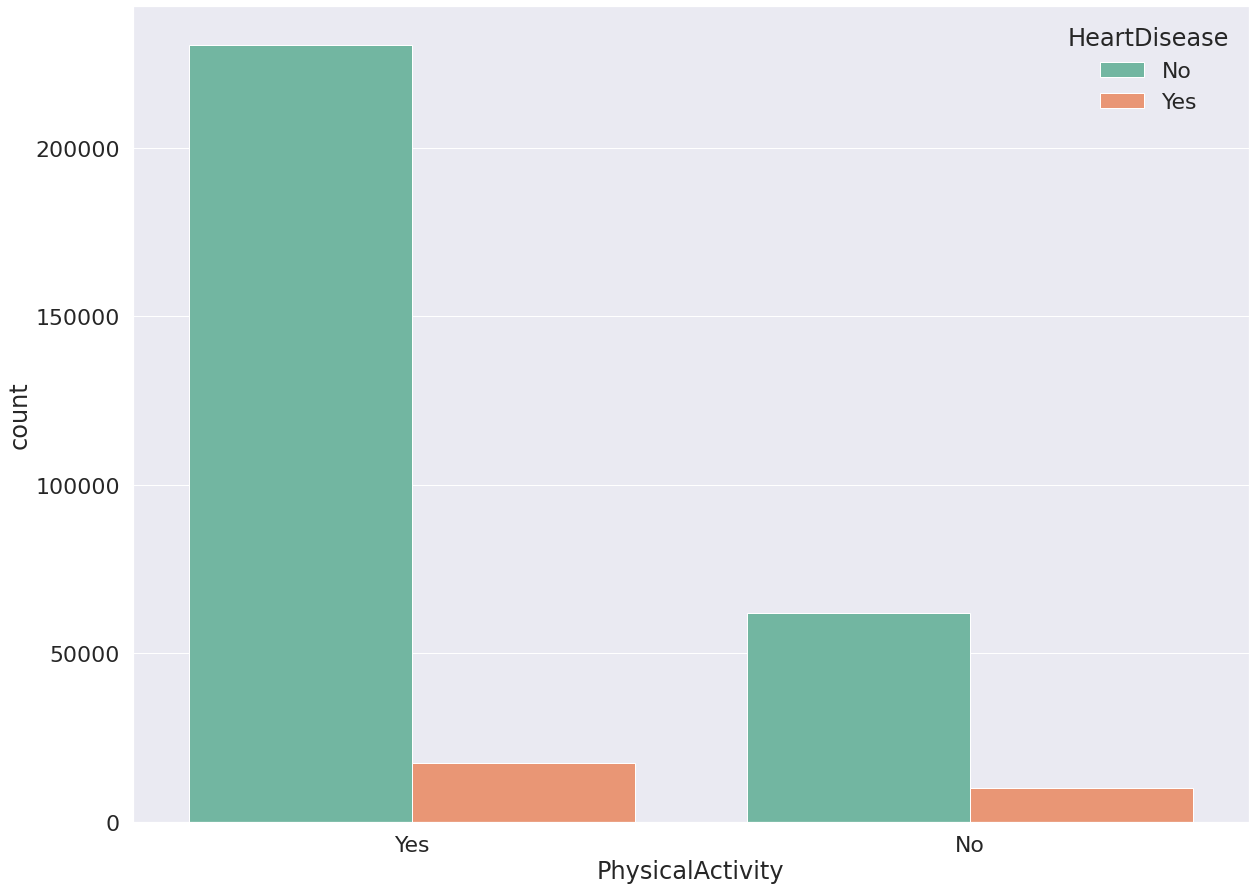

In [47]:
sns.countplot(x='PhysicalActivity', data=df1, hue='HeartDisease', palette='Set2')

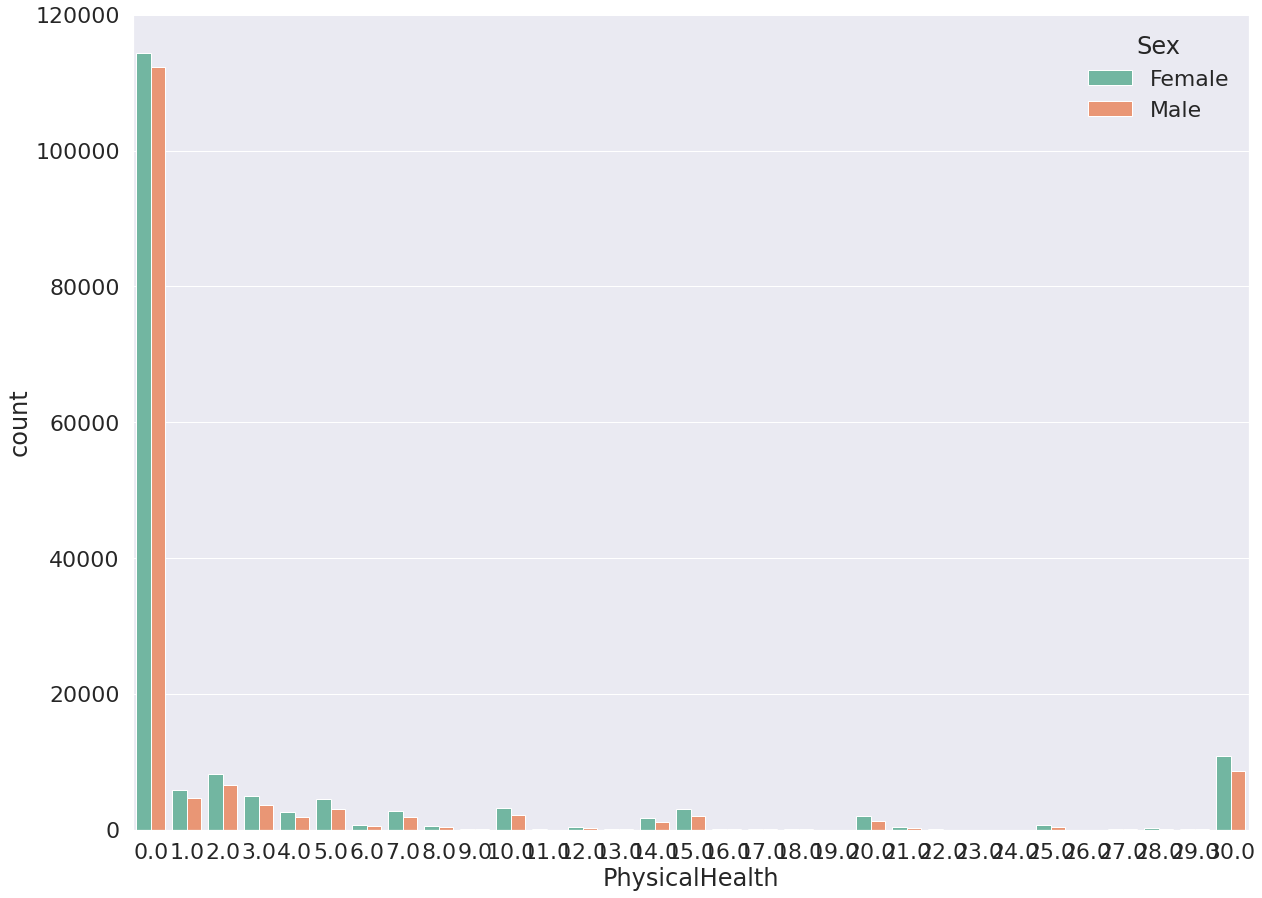

In [48]:
sns.countplot(x='PhysicalHealth', data=df1, hue='Sex', palette='Set2')

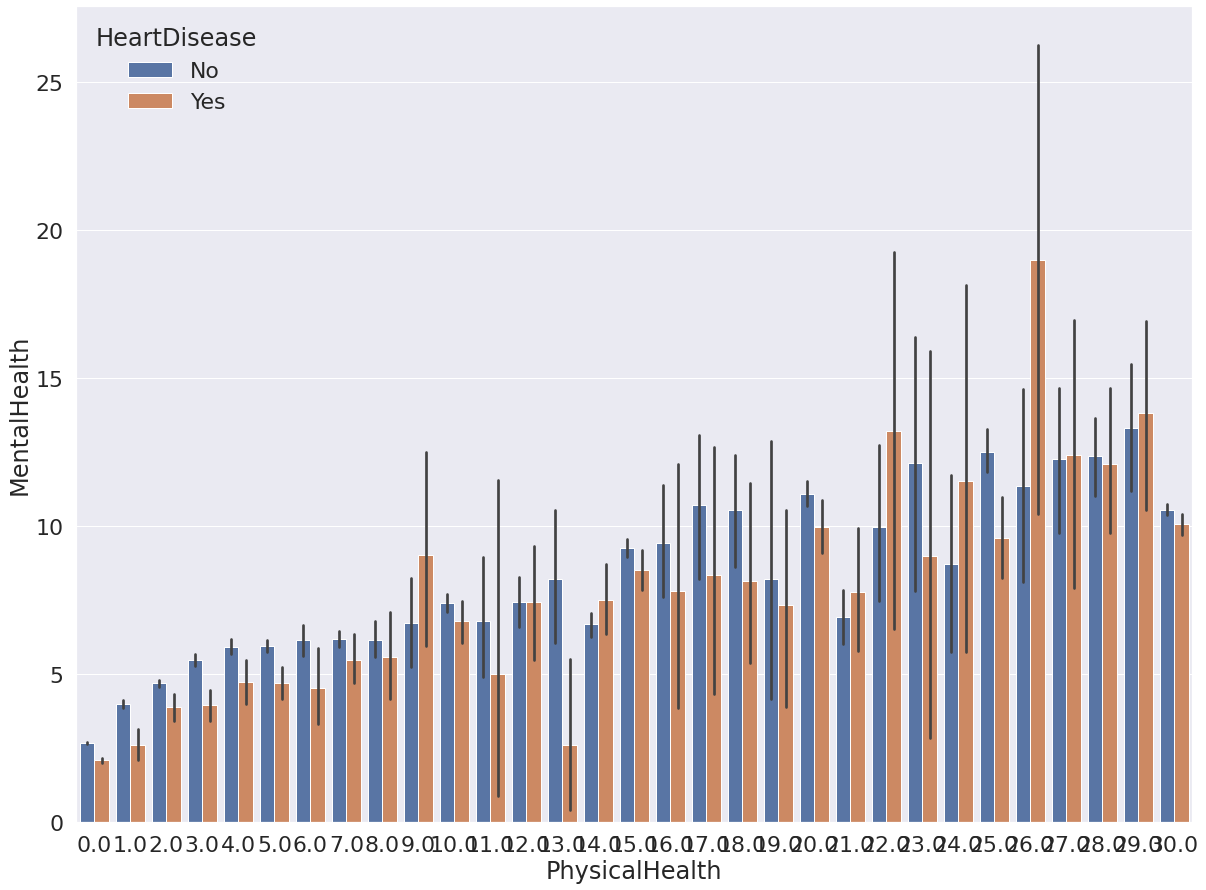

In [49]:
sns.barplot(data=df1, x="PhysicalHealth", y="MentalHealth", hue="HeartDisease")

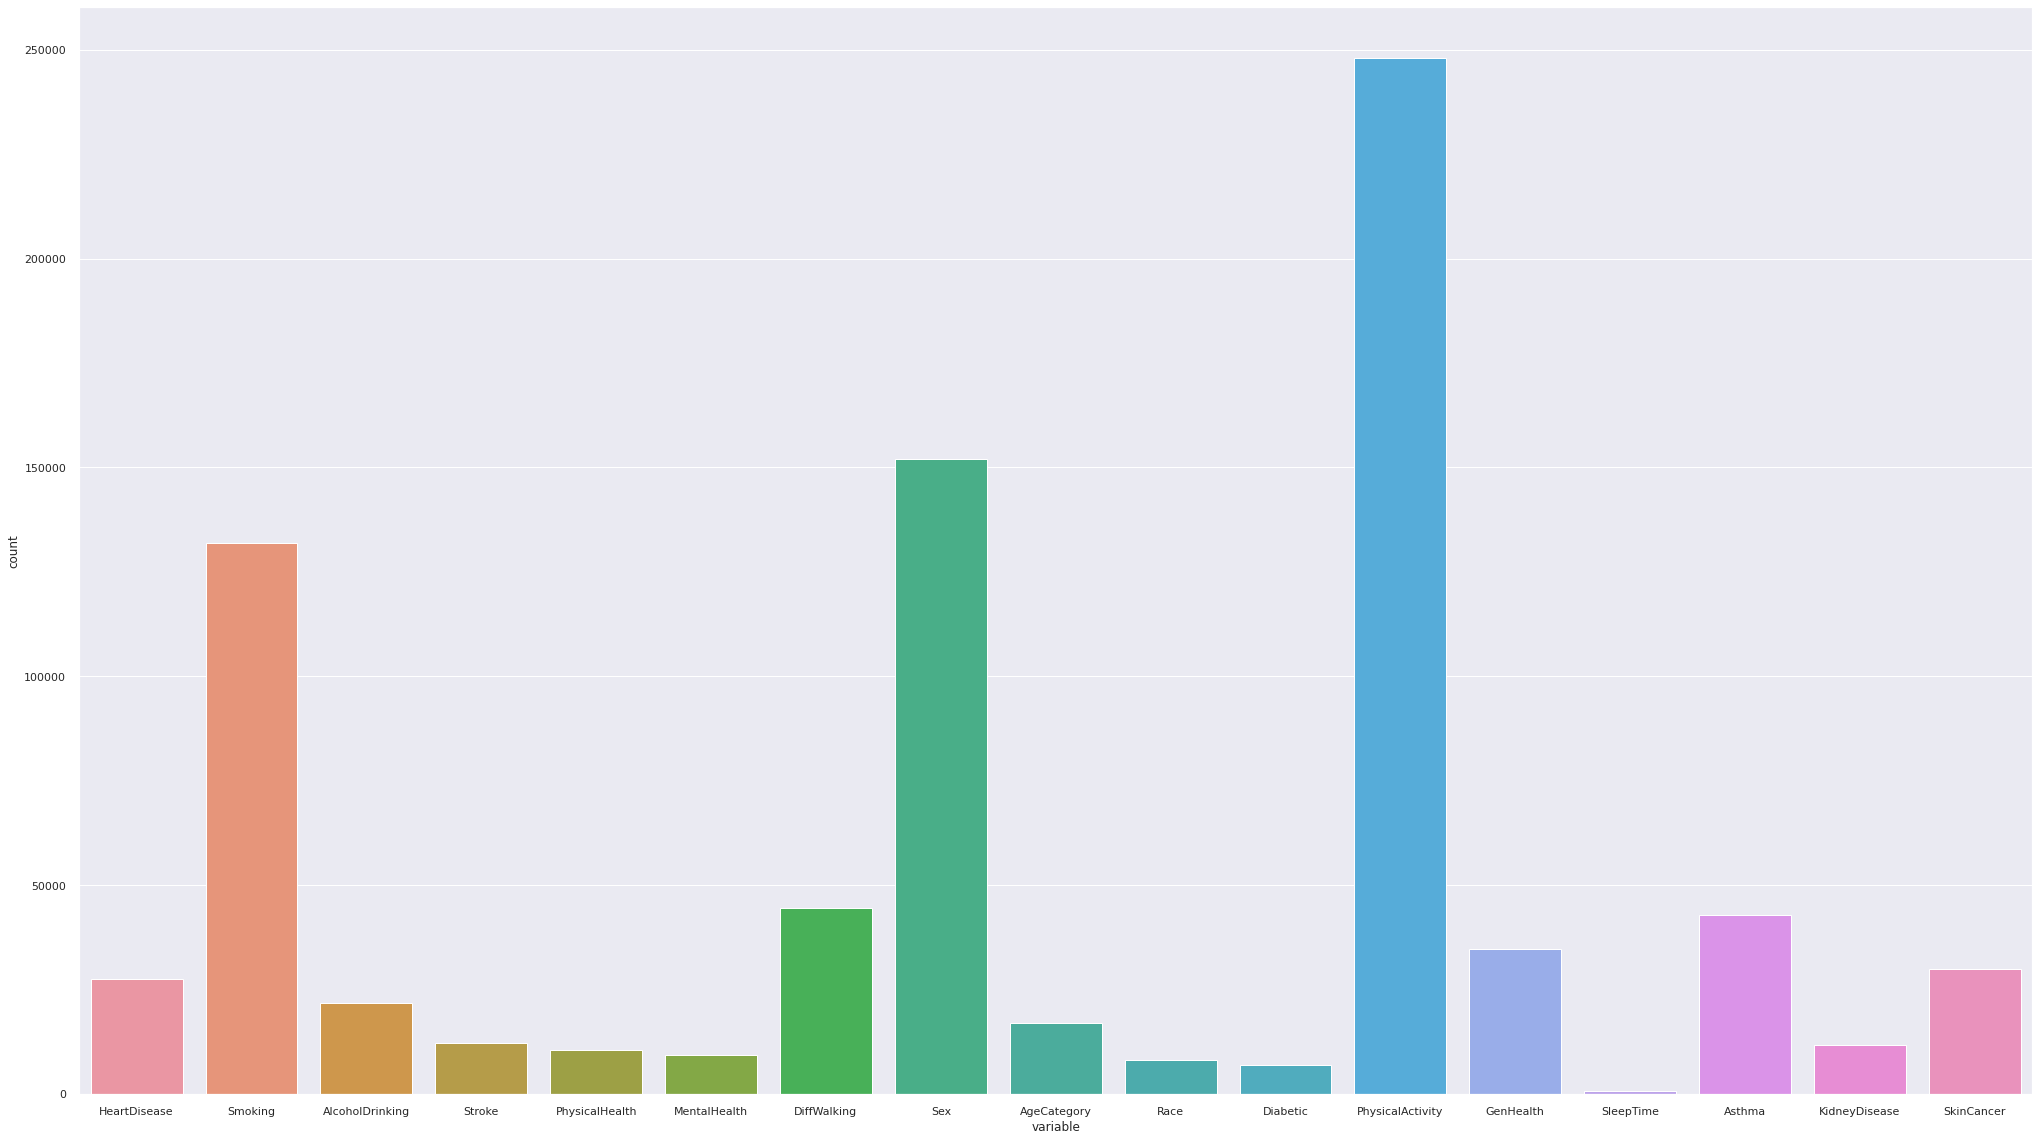

In [51]:
df_cplot = analysis.melt(value_vars=analysis.columns)
df_cplot = df_cplot[df_cplot["value"] == 1] #atleast take 1
sns.countplot(data=df_cplot, x="variable")
plt.show()
sns.set(rc={'figure.figsize':(35,20)})

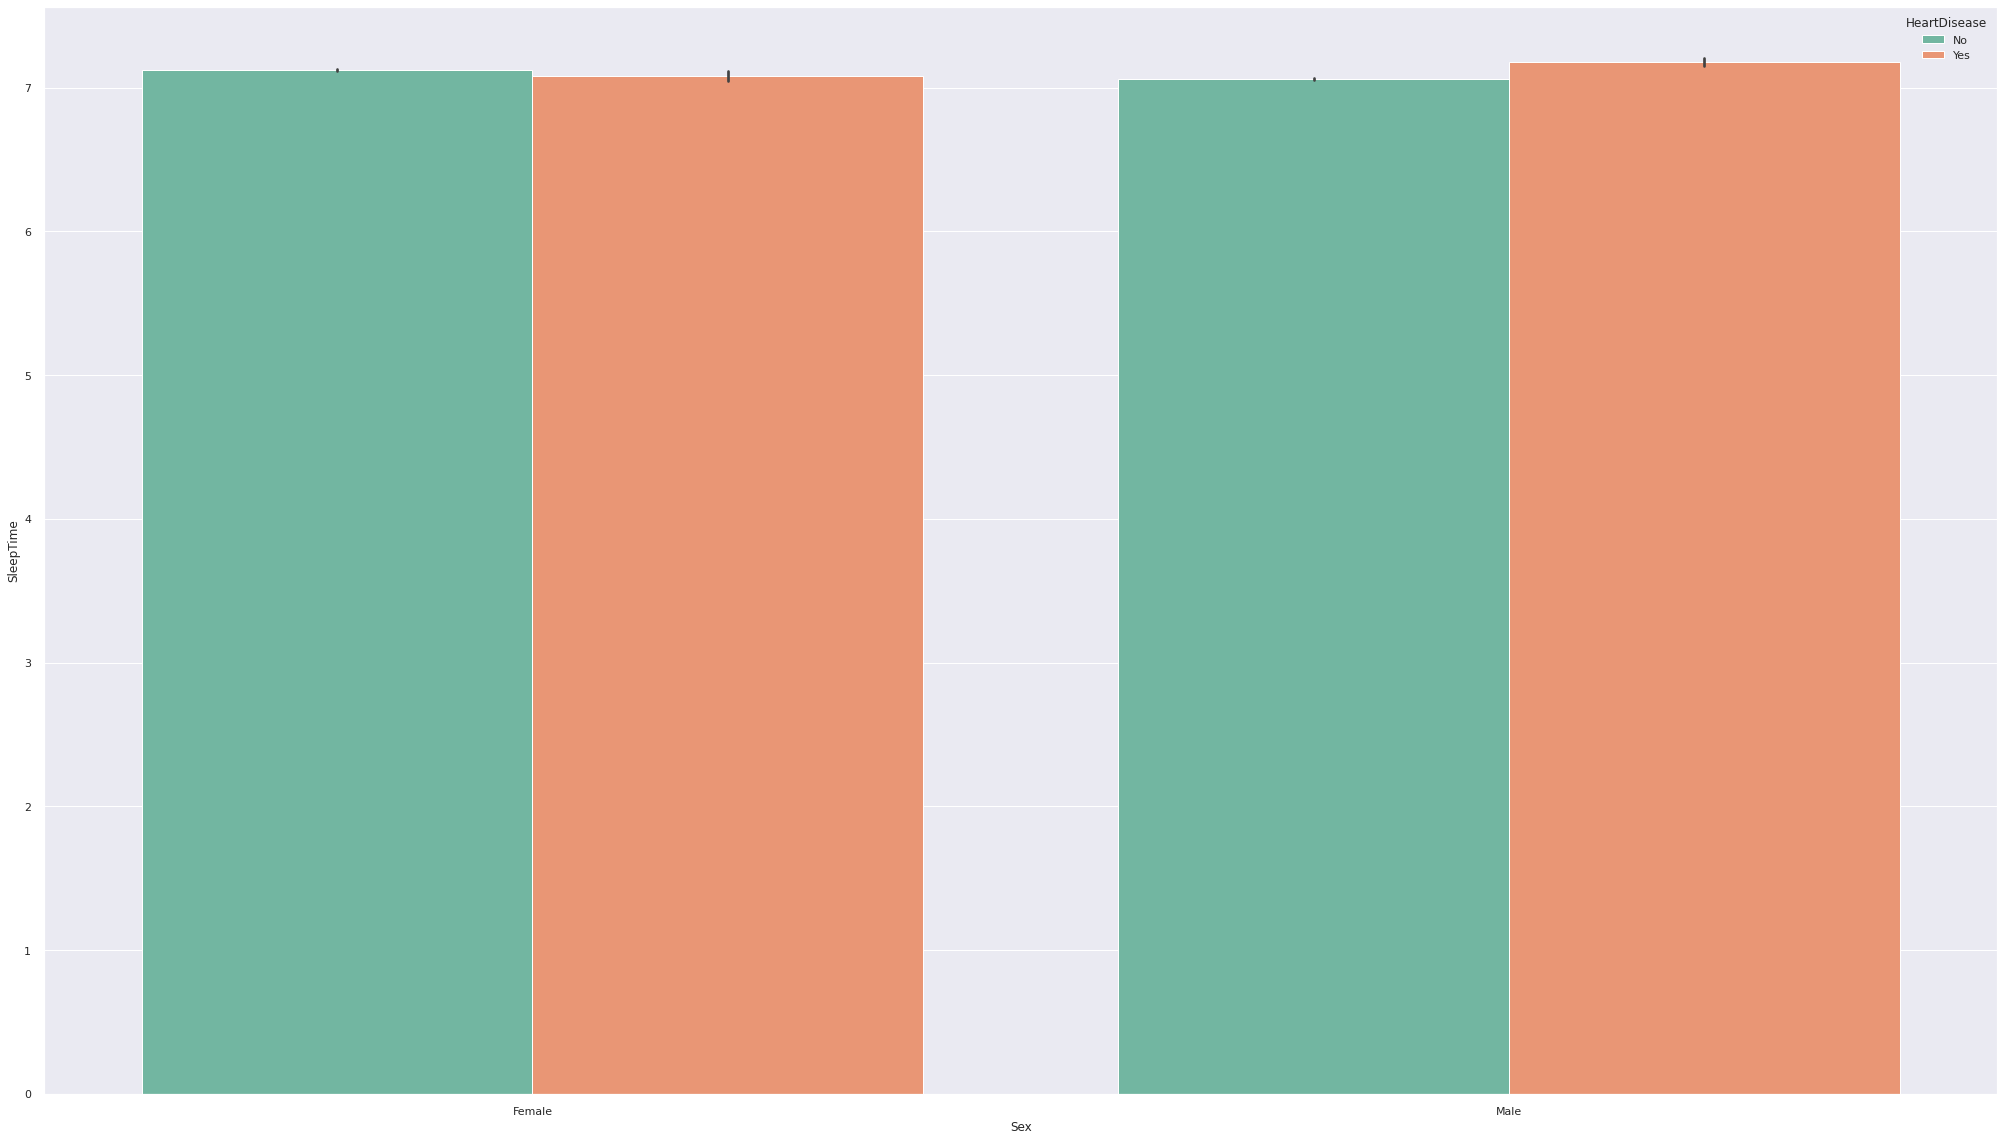

In [52]:
sns.barplot(data=df1, x="Sex", y="SleepTime", hue="HeartDisease", palette='Set2' )

In [53]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

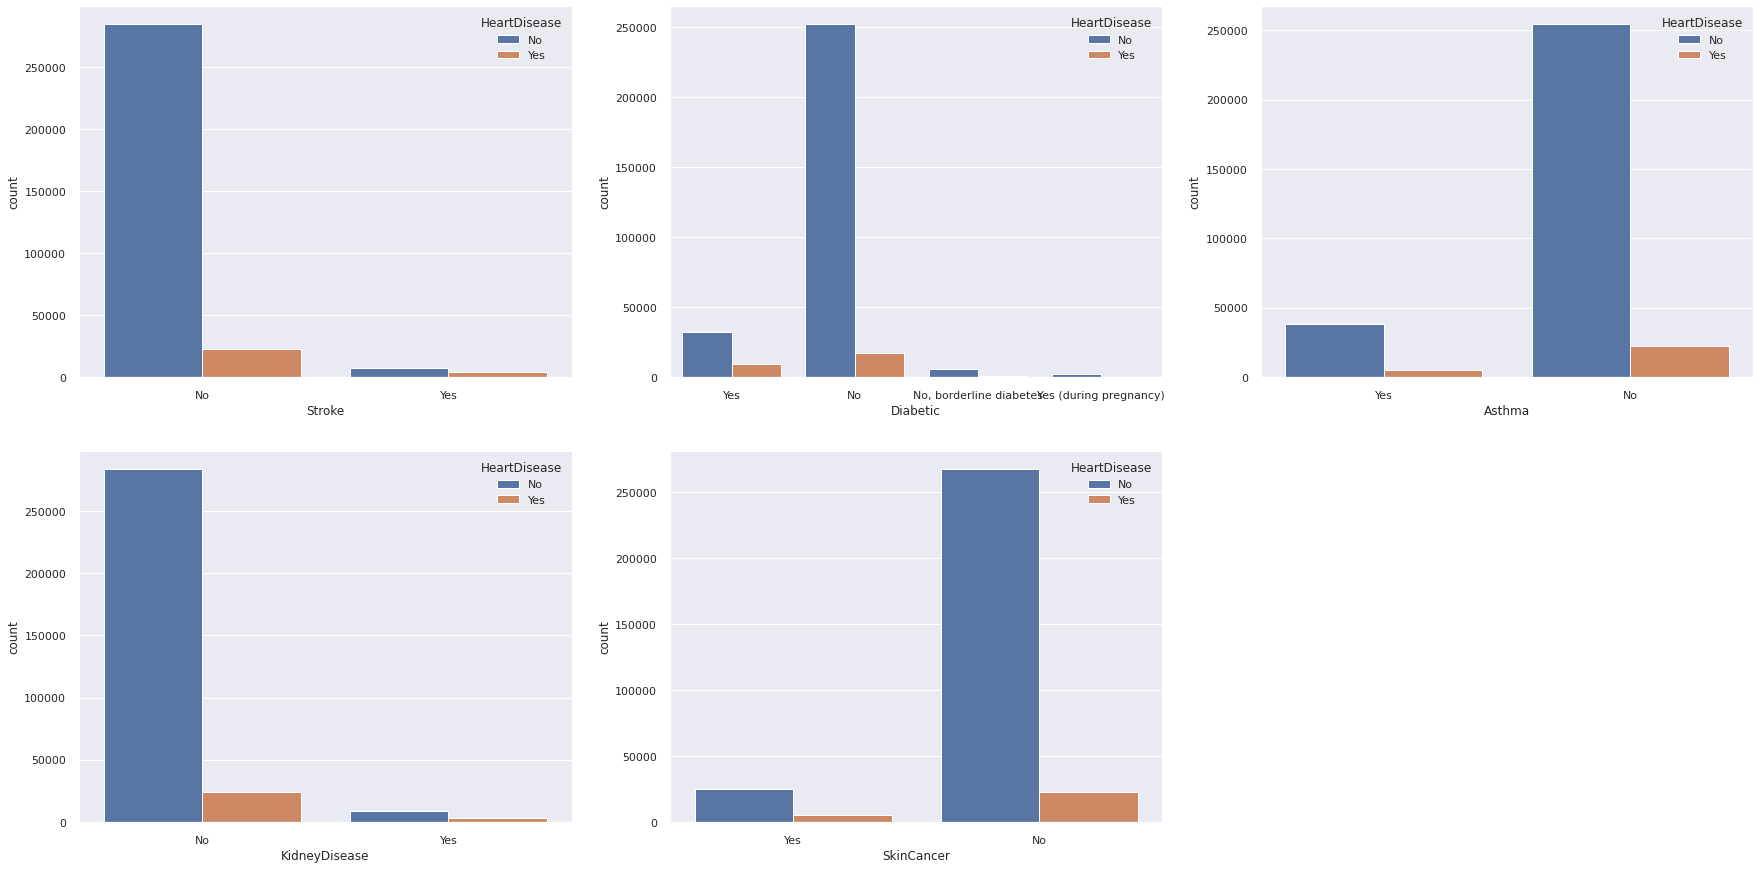

In [57]:
plt.figure(figsize = (30,15))
plt.subplot(2,3,1) #2rows 2cols #serialno
sns.countplot(x='Stroke', hue='HeartDisease',data=df1)
plt.subplot(2,3,2)
sns.countplot(x='Diabetic', hue='HeartDisease',data=df1)
plt.subplot(2,3,3)
sns.countplot(x='Asthma', hue='HeartDisease',data=df1)
plt.subplot(2,3,4)
sns.countplot(x='KidneyDisease', hue='HeartDisease',data=df1)
plt.subplot(2,3,5)
sns.countplot(x='SkinCancer', hue='HeartDisease',data=df1)

**String to Numeric Value replacement for HearDisease Column**

In [58]:
out=df1.HeartDisease.replace(['Yes','No'], [1,0])

In [59]:
df_numerice= df1.select_dtypes(include=np.number)
concat=pd.concat([df_numerice, out], axis=1)
concat.head(3)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,16.60,3.0,30.0,5.0,0
1,20.34,0.0,0.0,7.0,0
2,26.58,20.0,30.0,8.0,0


#**Outliers Analysis**

In [61]:
df1=df.copy()
#find outliers
df1=df.copy()
for col in df1.columns:
    if df1[col].dtypes != object:
        q1 = df1[col].quantile(0.25)
        #q2 = df1[col].quantile(0.50)
        q3 = df1[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('q1',q1)
        print('q3',q3)
        print('llp',llp)
        print('ulp',ulp)
        print('IQR',IQR)
 

column name BMI
q1 24.03
q3 31.42
llp 12.945
ulp 42.505
IQR 7.390000000000001
column name PhysicalHealth
q1 0.0
q3 2.0
llp -3.0
ulp 5.0
IQR 2.0
column name MentalHealth
q1 0.0
q3 3.0
llp -4.5
ulp 7.5
IQR 3.0
column name SleepTime
q1 6.0
q3 8.0
llp 3.0
ulp 11.0
IQR 2.0


In [62]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

BMI               7.39
PhysicalHealth    2.00
MentalHealth      3.00
SleepTime         2.00
dtype: float64


In [63]:
df1.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


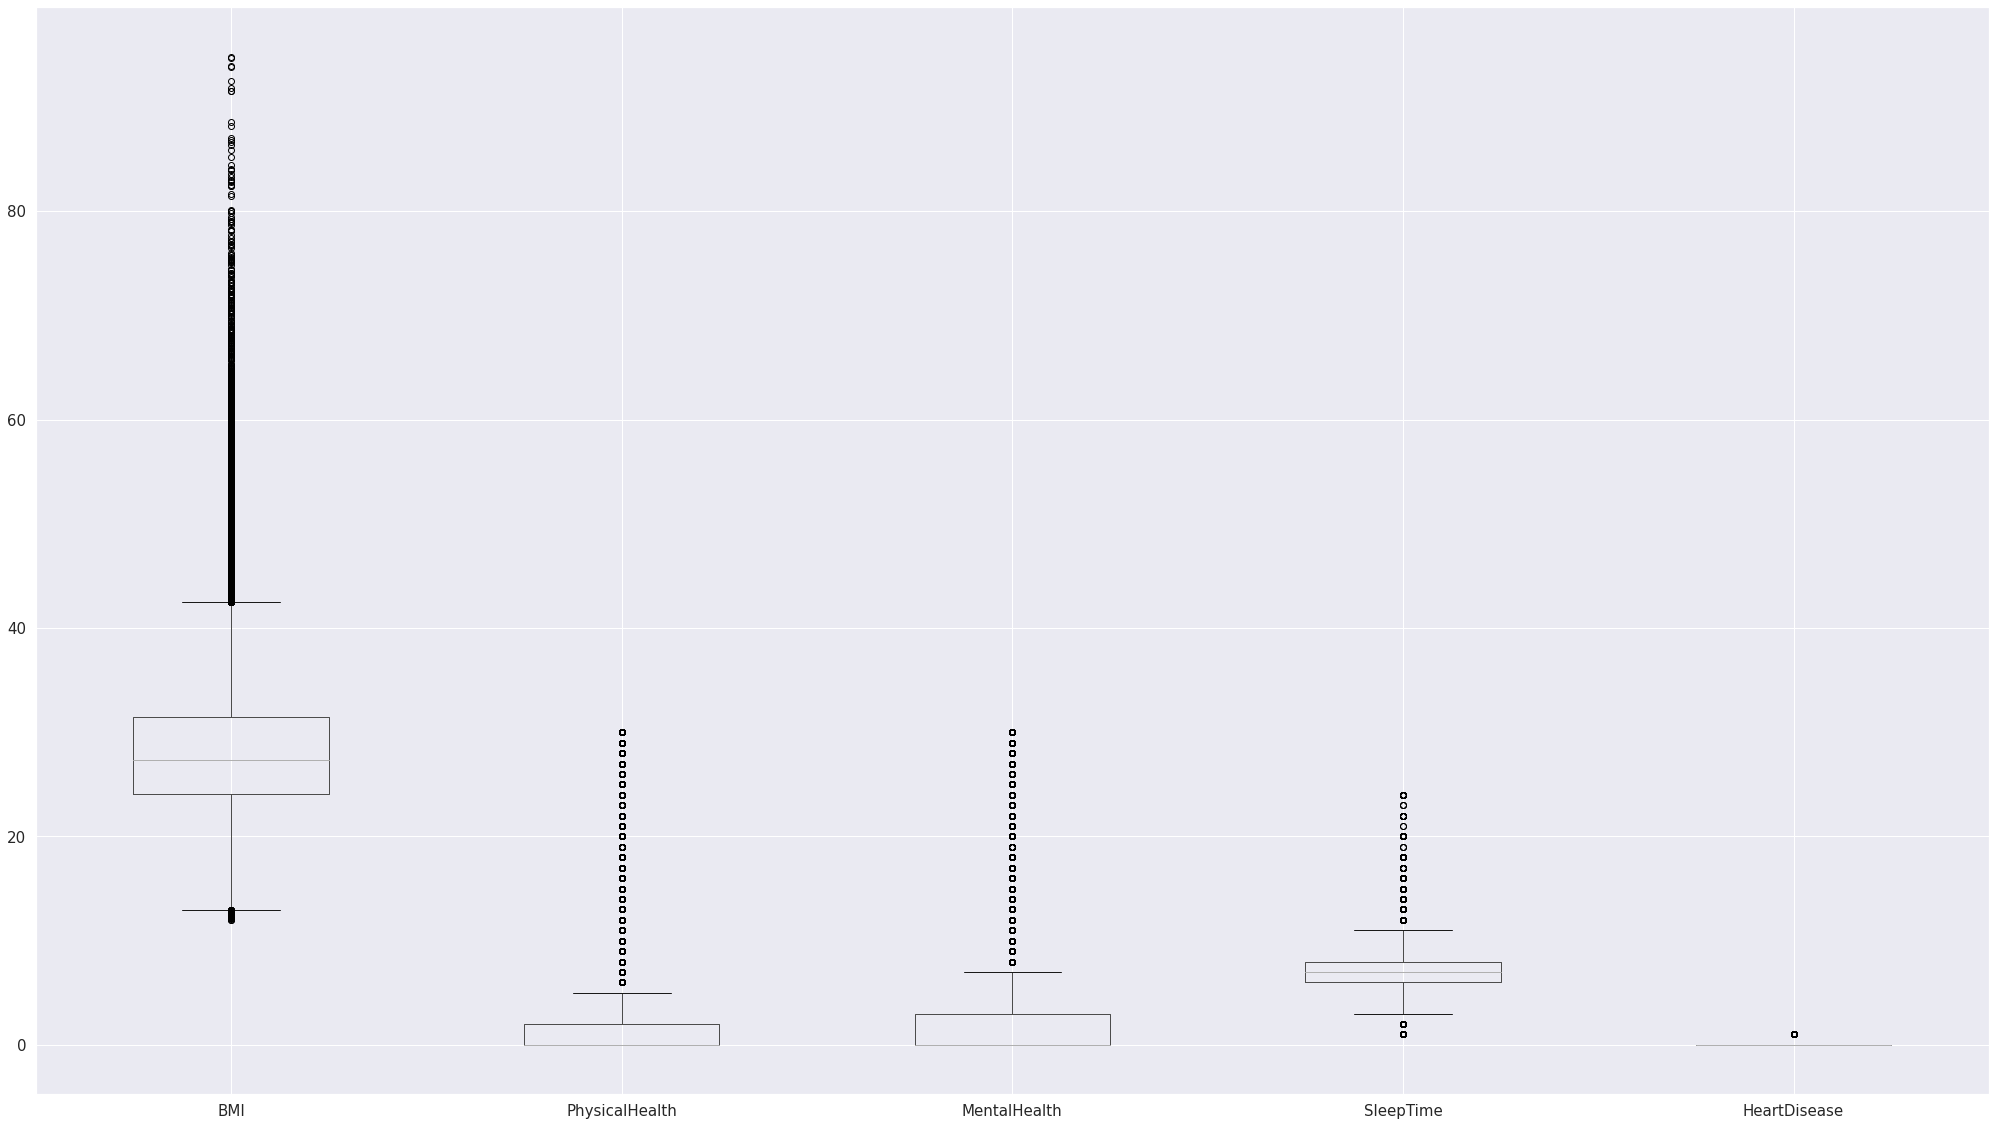

<Figure size 720x504 with 0 Axes>

In [ ]:
#Boxplot for Numerical column and find outliers
boxplot = concat.boxplot(column=['BMI',	'PhysicalHealth',	'MentalHealth',	'SleepTime', 'HeartDisease'], return_type='axes',  fontsize=15)  #
fig = plt.figure(figsize =(10, 7))

**Prepare KDA Plot**

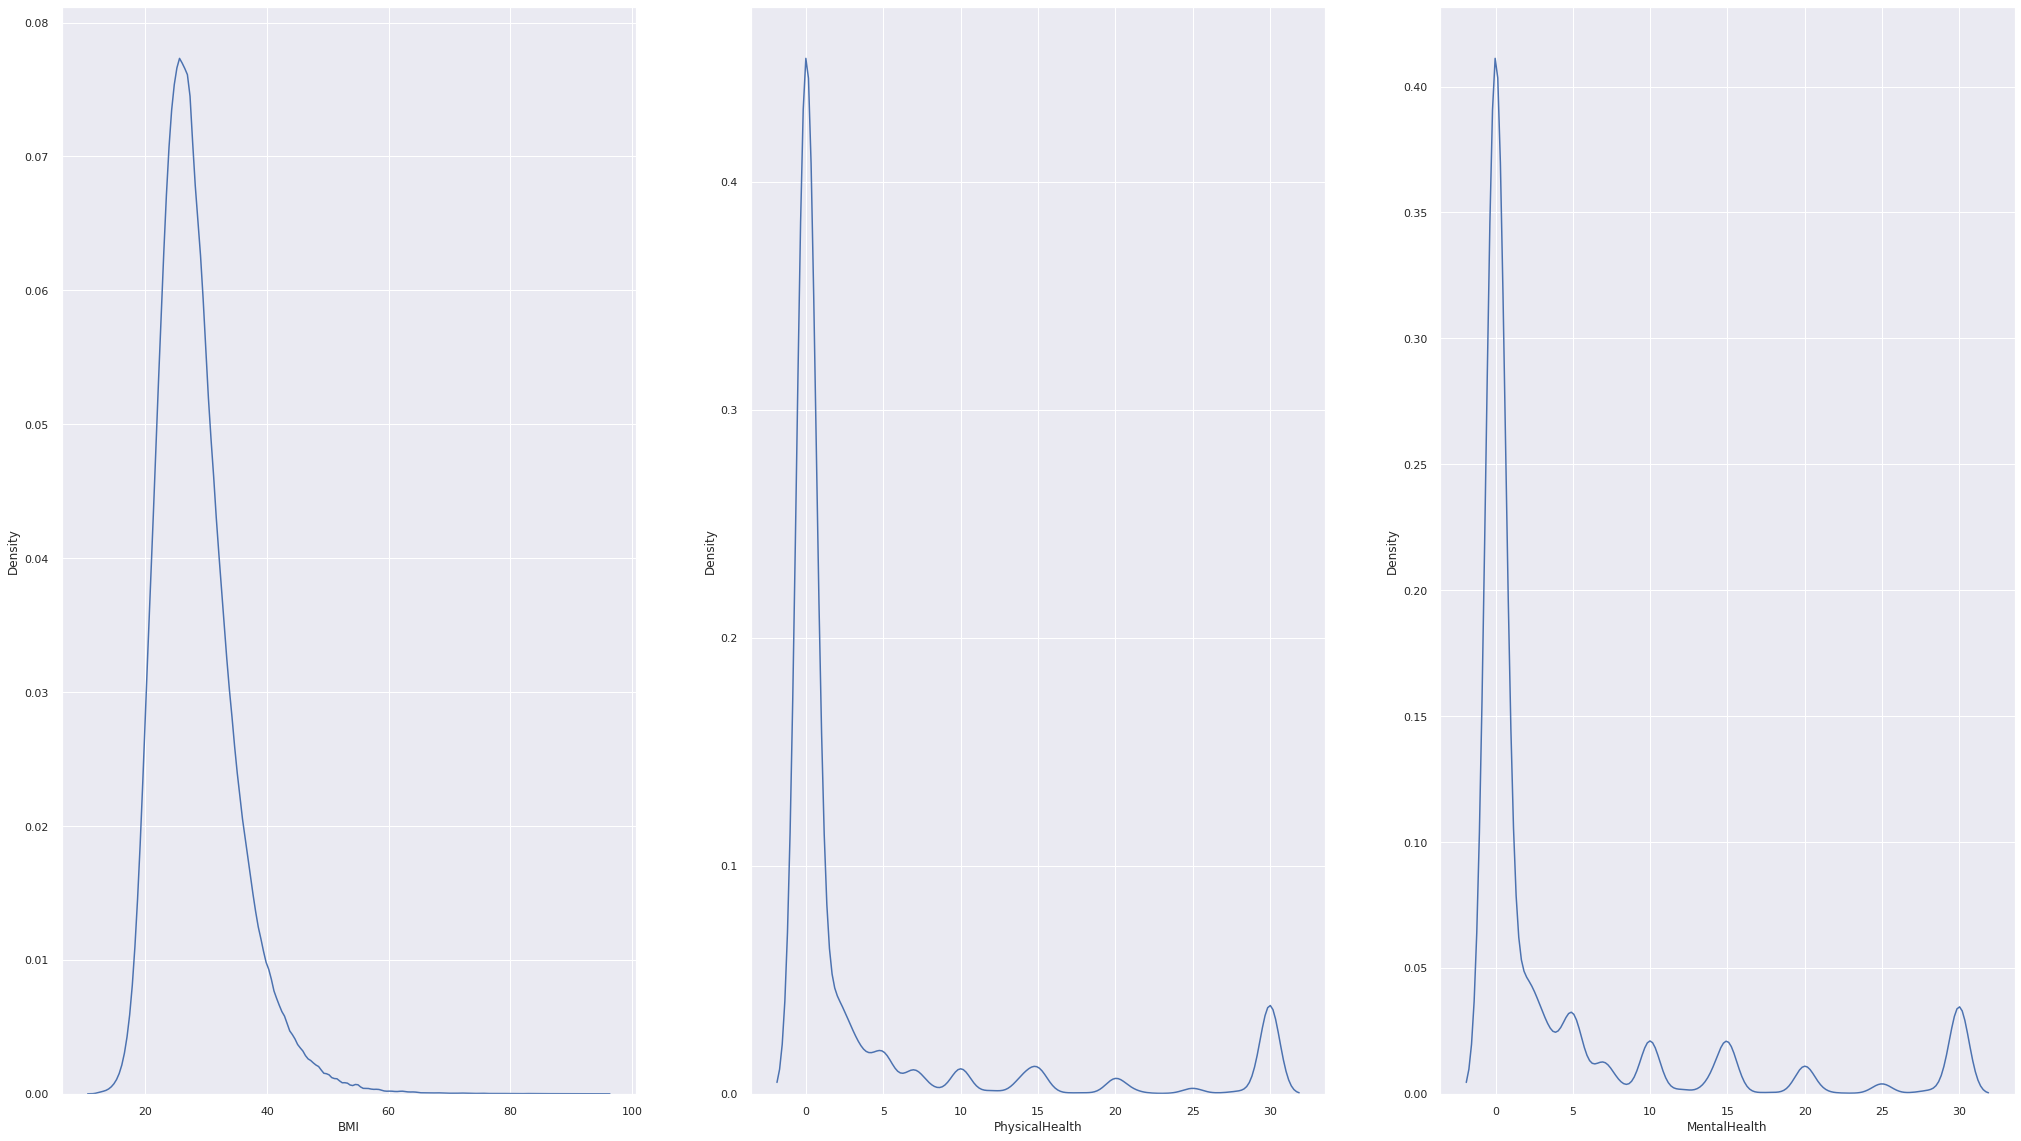

In [64]:
fig, axes = plt.subplots(1,3) #no of row 1 and col 3
sns.set(rc={'figure.figsize':(40,12)})
sns.kdeplot(data=df1, x='BMI', ax = axes[0])
sns.kdeplot(data=df1, x='PhysicalHealth', ax = axes[1])
sns.kdeplot(data=df1, x='MentalHealth', ax = axes[2])

**Remove Outliers**

In [65]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

df2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(231020, 18)

In [66]:
df2.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,231020.000000,231020.000000,231020.000000,231020.000000
mean,27.498405,0.388265,0.755787,7.159748
std,5.032603,1.060739,1.641221,1.122396
min,12.970000,0.000000,0.000000,3.000000
25%,23.780000,0.000000,0.000000,6.000000
50%,26.880000,0.000000,0.000000,7.000000
75%,30.550000,0.000000,0.000000,8.000000
max,42.500000,5.000000,7.000000,11.000000


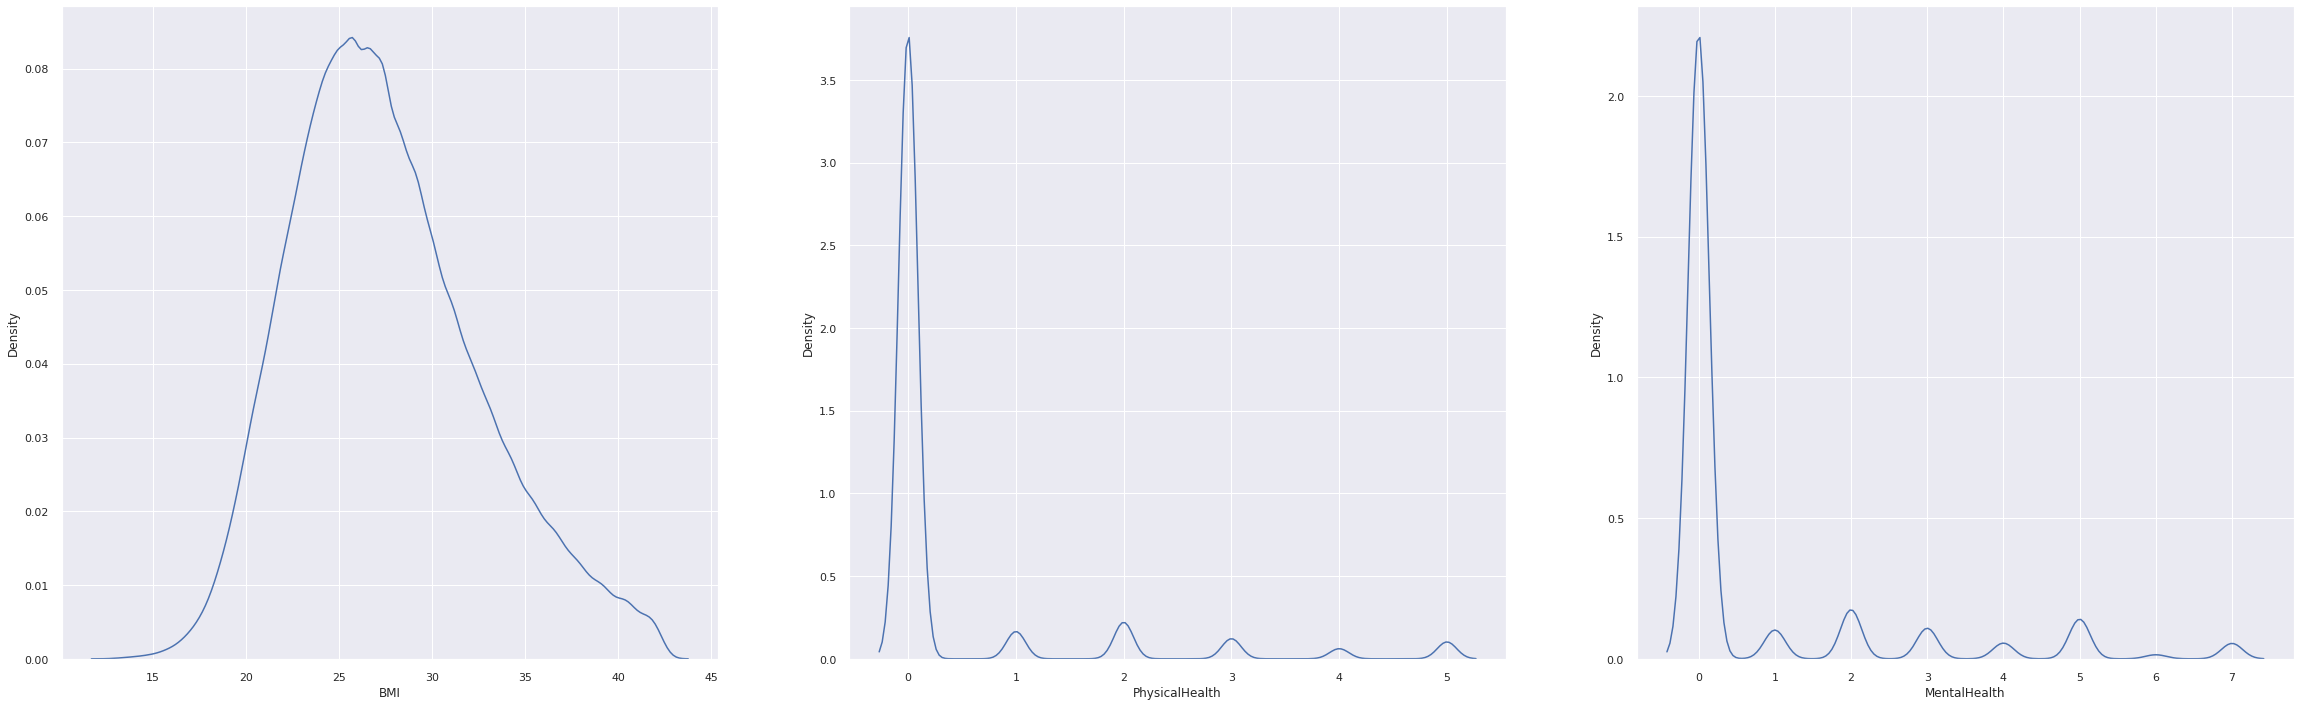

In [67]:
fig, axes = plt.subplots(1,3) #first 2 is no of col and second 2 is no of row
sns.set(rc={'figure.figsize':(40,12)})
sns.kdeplot(data=df2, x='BMI', ax = axes[0])
sns.kdeplot(data=df2, x='PhysicalHealth', ax = axes[1])
sns.kdeplot(data=df2, x='MentalHealth', ax = axes[2])

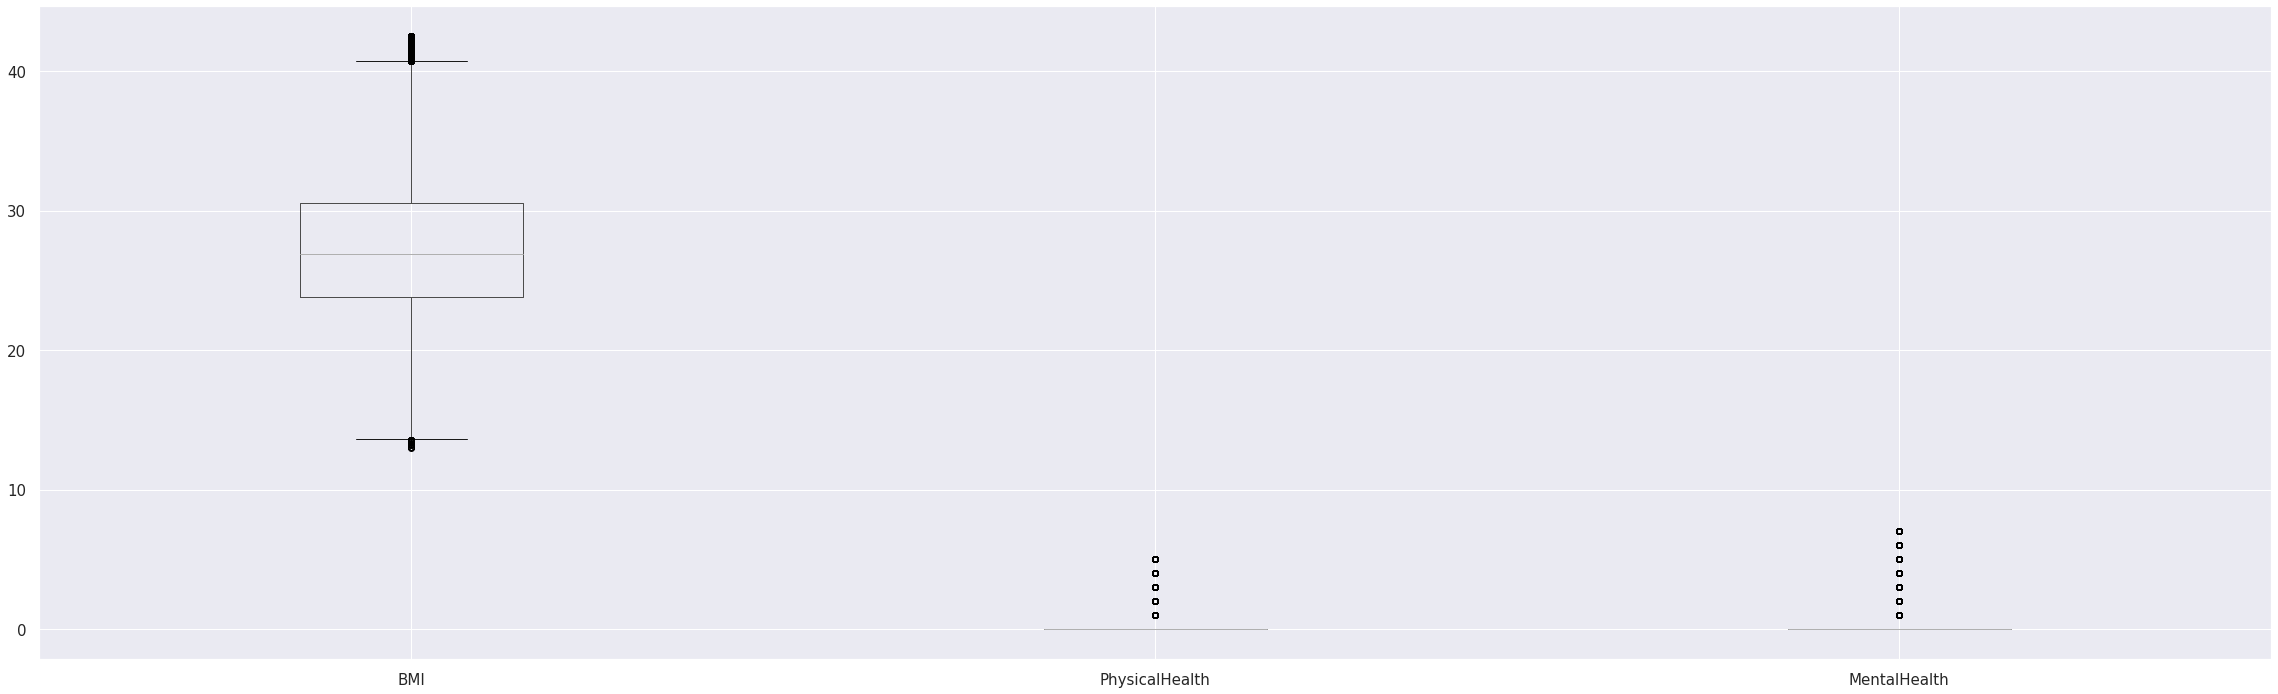

<Figure size 720x504 with 0 Axes>

In [68]:
boxplot = df2.boxplot(column=['BMI',	'PhysicalHealth',	'MentalHealth'], return_type='axes',  fontsize=15)  #
fig = plt.figure(figsize =(10, 7))

In [69]:
df2['PhysicalHealth'].value_counts()

0.0    196179
2.0     11470
1.0      8571
3.0      6318
5.0      5304
4.0      3178
Name: PhysicalHealth, dtype: int64

**kdeplot based on other columns**

In [ ]:
#import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(22,8)})
#fig, axes = plt.subplots(1,3)

#sns.kdeplot(data=df[df['Region']=='Europe'], x='Income', hue='Occupation', ax = axes[0])
#sns.kdeplot(data=df[df['Region']=='North America'], x='Income', hue='Occupation', ax = axes[1])
#sns.kdeplot(data=df[df['Region']=='Pacific'], x='Income', hue='Occupation', ax = axes[2])

**Inverse Transform After Label Encoding**

In [ ]:
#le.inverse_transform([2, 2, 1])

#**Feature Selection**

In [ ]:
#https://wellsr.com/python/data-scaling-and-normalization-with-python/
#https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/


In [ ]:
!pip install featurewiz

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [72]:
df3=df2.copy()
df3.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No


#**Sampling for imbalace Dataset**

In [73]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Feature Scaling and Encoding**

In [74]:
le=LabelEncoder()
sc=StandardScaler()
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df3.columns:
  if is_numeric_dtype(df3[column]):
    df3[column]=sc.fit_transform(df3[[column]])
    
  else:
    df3[column]=le.fit_transform(df3[[column]])
df3.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,-1.422409,0,0,1,-0.366034,-0.460504,0,0,12,5,0,1,4,-0.142328,0,0,0
3,0,-0.653422,0,0,0,-0.366034,-0.460504,0,0,11,5,0,0,2,-1.033281,0,0,1
7,0,0.822955,1,0,0,4.347674,-0.460504,1,0,12,5,2,0,2,1.639578,1,0,0


# **Prepare train.csv for ML models evaluation**

In [78]:
df3.to_csv('train.csv', index=False)

In [81]:
df3.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

**Different ML Models Evaluation for Under sampling using prepared train.csv from HeartDisease Dataset**                                          

In [ ]:
https://github.com/Shibli-Nomani/project-01--Heart-Disease/blob/main/hyper_para_multiple_ml_undersample_heart_disease.ipynb

**Different ML Models Evaluation for Oversampling (SMOTETomek) using prepared train.csv from HeartDisease Dataset**    

In [ ]:
https://github.com/Shibli-Nomani/project-01--Heart-Disease/blob/main/hyper_para_multiple_ml_oversample_heart_disease.ipynb

**Model Evaluation with Artificial Neural Network with Under sampling**

In [ ]:
https://github.com/Shibli-Nomani/project-01--Heart-Disease/blob/main/ANN_under_over_sample_heartdisease.ipynb